## Predicting the Quality Of A Wine As 'Good' When Quality Rating Is More Than Or Equal To 6.    'Bad' When Quality Rating Is Less Than 6.



### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, iqr
from statsmodels.stats import weightstats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


### Reading .CSV File

In [2]:
data = pd.read_csv('QualityPrediction.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Description

In [3]:
print(data.info())
print()
data.describe(include = 'all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Outlier Visualization

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

##### Fixed Acidity Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

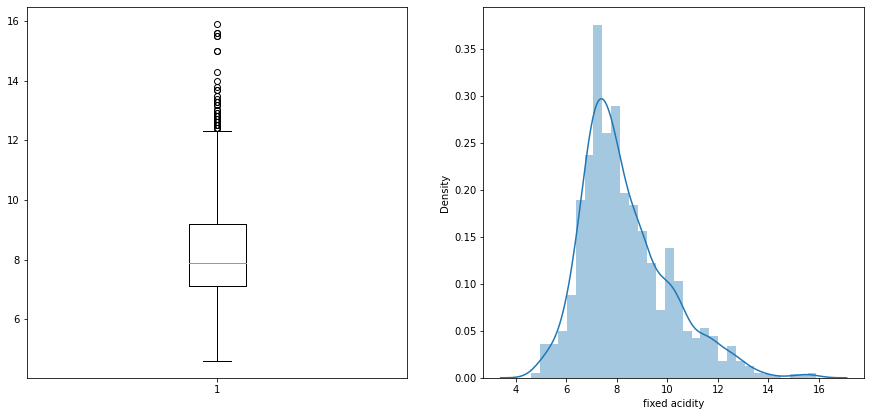

In [5]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['fixed acidity'])
ax = plt.subplot(2,2,2)
sns.distplot(data['fixed acidity'])

In [6]:
def remove_outlier(column):
    global data
    high = data[column].mean() + 3*data[column].std()
    low = data[column].mean() - 3*data[column].std()
    data = data[(data[column]<high) & (data[column]>low)]
    plt.figure(figsize=(15,15))
    

##### Fixed Acidity After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

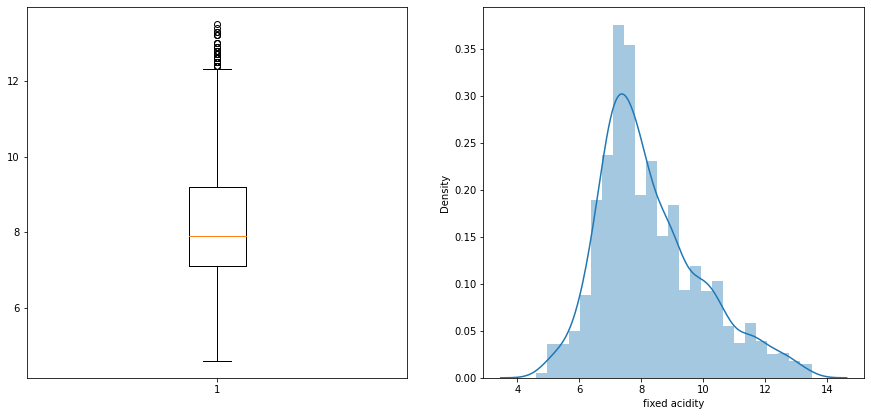

In [7]:
remove_outlier('fixed acidity')
ax = plt.subplot(2,2,1)
plt.boxplot(data['fixed acidity'])
ax = plt.subplot(2,2,2)
sns.distplot(data['fixed acidity'])

##### Volatile Acidity Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

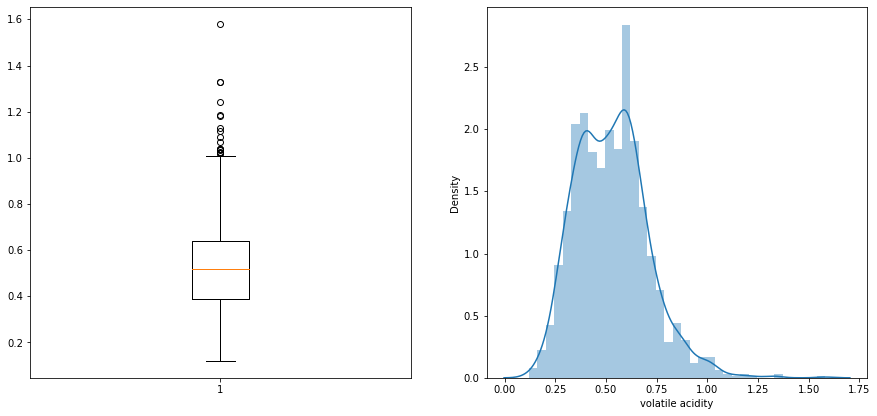

In [8]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['volatile acidity'])
ax = plt.subplot(2,2,2)
sns.distplot(data['volatile acidity'])

##### Volatile Acidity After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

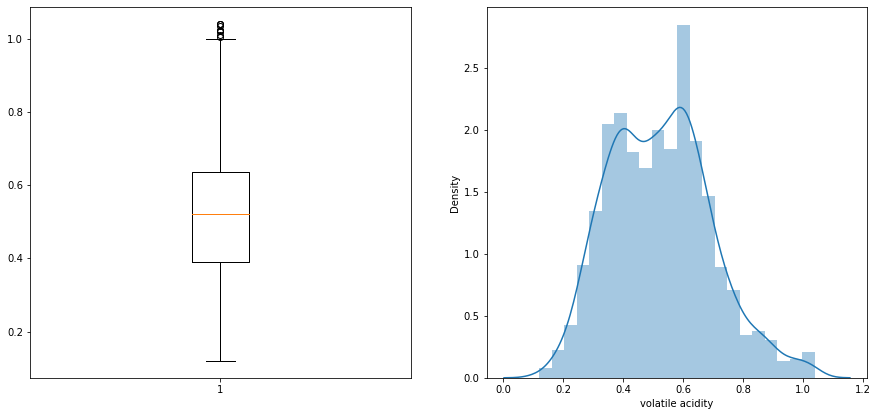

In [9]:
remove_outlier('volatile acidity')
ax = plt.subplot(2,2,1)
plt.boxplot(data['volatile acidity'])
ax = plt.subplot(2,2,2)
sns.distplot(data['volatile acidity'])

##### Citric Acid Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

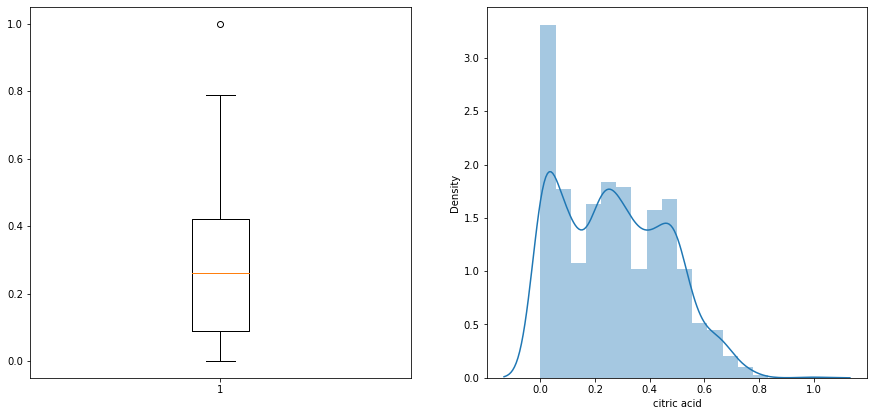

In [10]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['citric acid'])
ax = plt.subplot(2,2,2)
sns.distplot(data['citric acid'])

##### Citric Acid After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

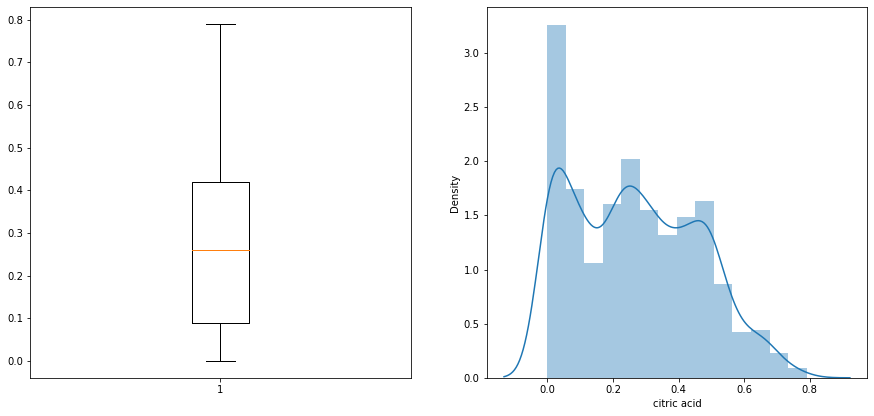

In [11]:
remove_outlier('citric acid')
ax = plt.subplot(2,2,1)
plt.boxplot(data['citric acid'])
ax = plt.subplot(2,2,2)
sns.distplot(data['citric acid'])

#### Residual sugar Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

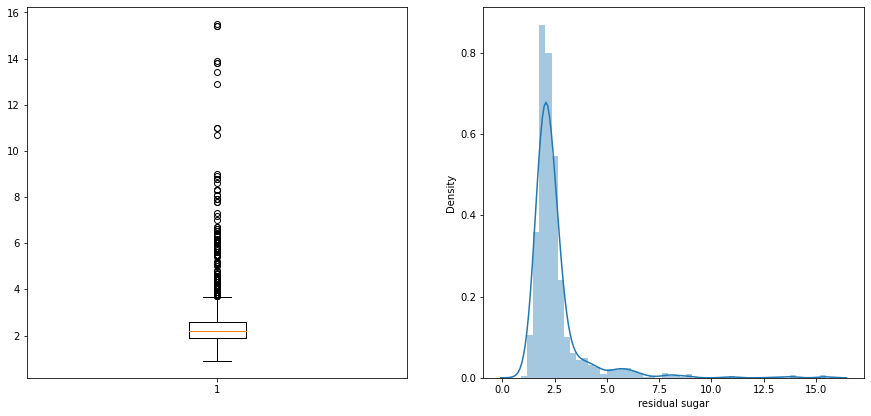

In [12]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['residual sugar'])
ax = plt.subplot(2,2,2)
sns.distplot(data['residual sugar'])

#### Residual sugar After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

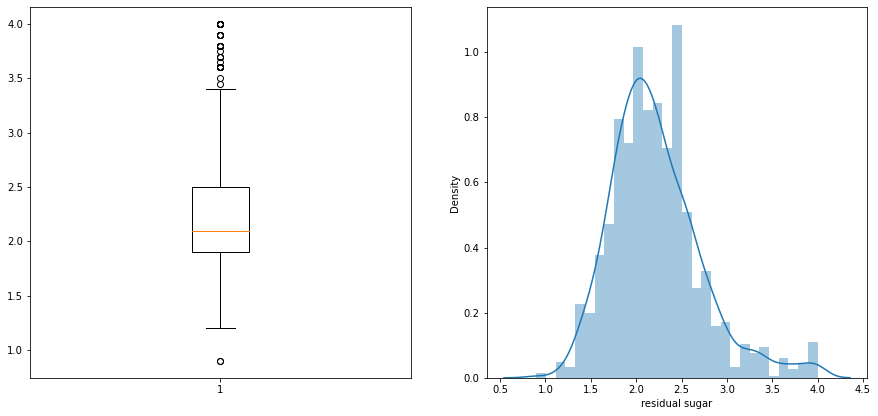

In [62]:
remove_outlier('residual sugar')
ax = plt.subplot(2,2,1)
plt.boxplot(data['residual sugar'])
ax = plt.subplot(2,2,2)
sns.distplot(data['residual sugar'])

##### Sulphates Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

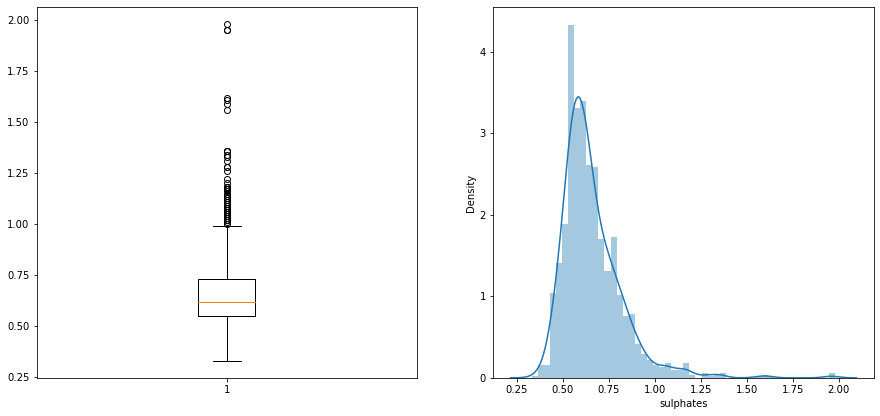

In [14]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['sulphates'])
ax = plt.subplot(2,2,2)
sns.distplot(data['sulphates'])

##### Sulphates After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

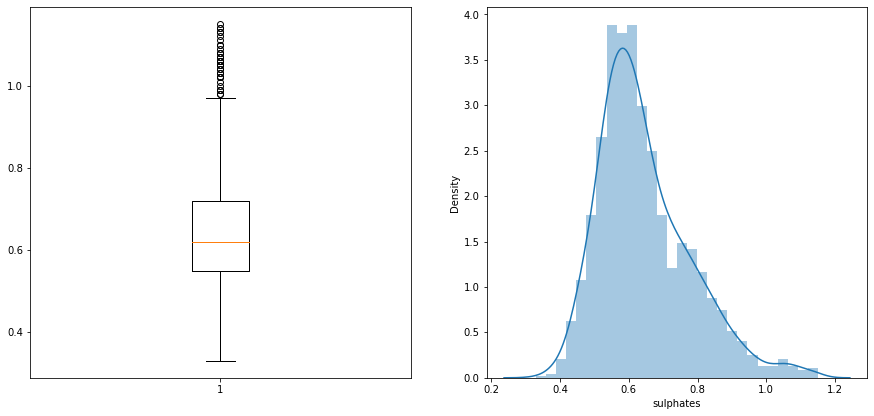

In [15]:
remove_outlier('sulphates')
ax = plt.subplot(2,2,1)
plt.boxplot(data['sulphates'])
ax = plt.subplot(2,2,2)
sns.distplot(data['sulphates'])

##### Chlorides Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

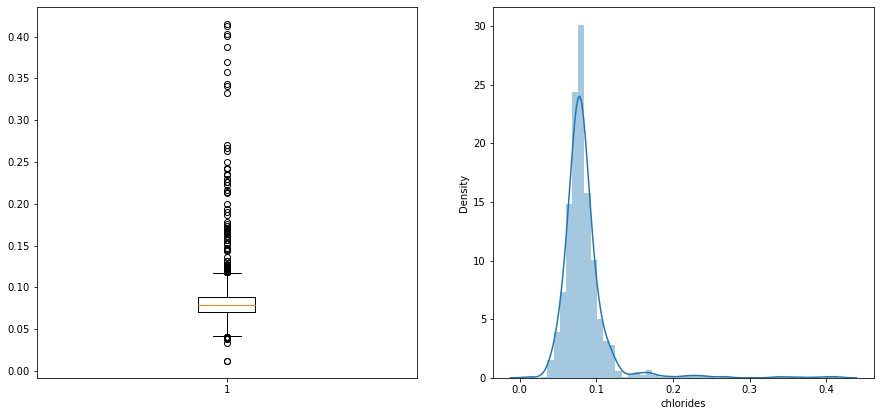

In [16]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['chlorides'])
ax = plt.subplot(2,2,2)
sns.distplot(data['chlorides'])

##### Chlorides After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chlorides', ylabel='Density'>

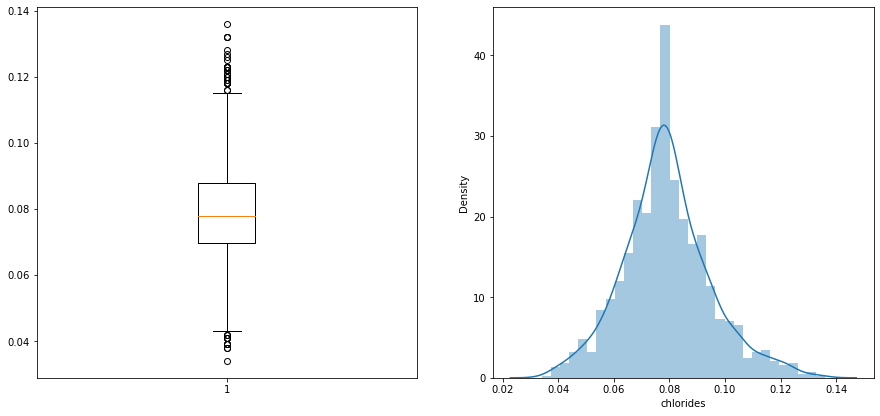

In [63]:
remove_outlier('chlorides')
ax = plt.subplot(2,2,1)
plt.boxplot(data['chlorides'])
ax = plt.subplot(2,2,2)
sns.distplot(data['chlorides'])

##### Alcohol Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

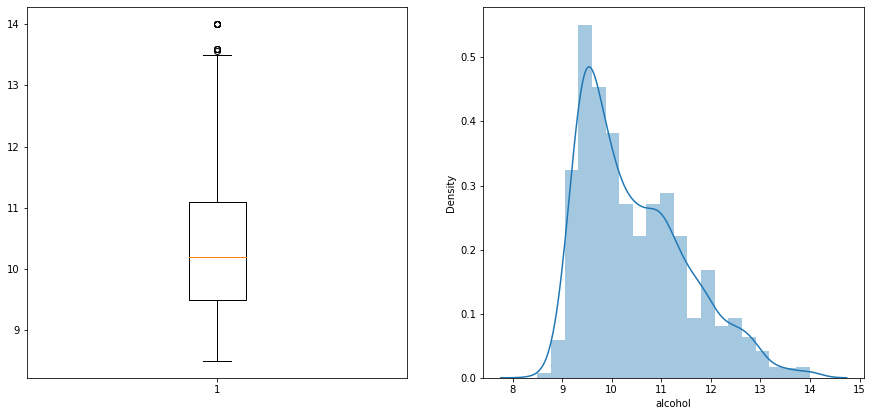

In [18]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['alcohol'])
ax = plt.subplot(2,2,2)
sns.distplot(data['alcohol'])

##### Alcohol After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

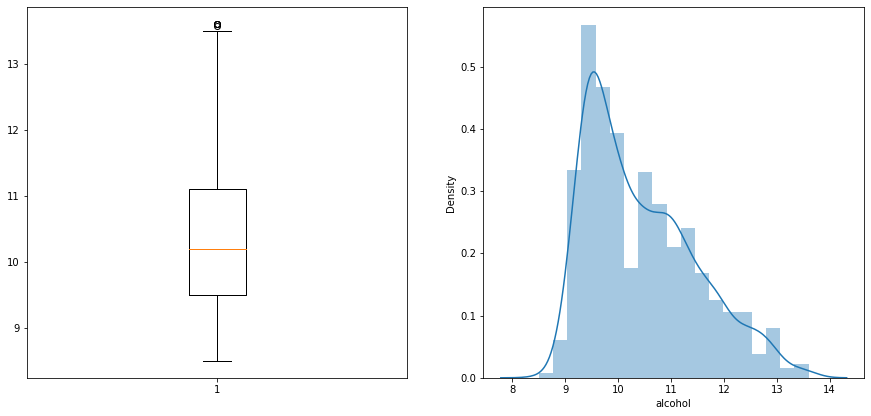

In [19]:
remove_outlier('alcohol')
ax = plt.subplot(2,2,1)
plt.boxplot(data['alcohol'])
ax = plt.subplot(2,2,2)
sns.distplot(data['alcohol'])

##### free sulfur dioxide Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

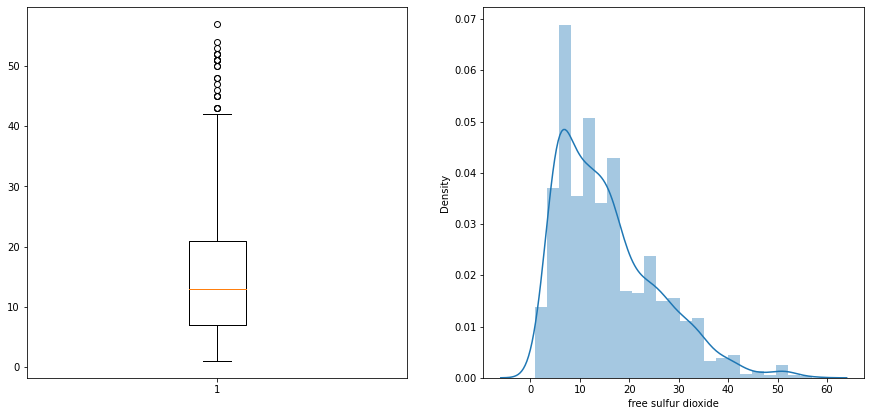

In [20]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['free sulfur dioxide'])
ax = plt.subplot(2,2,2)
sns.distplot(data['free sulfur dioxide'])

##### free sulfur dioxide After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

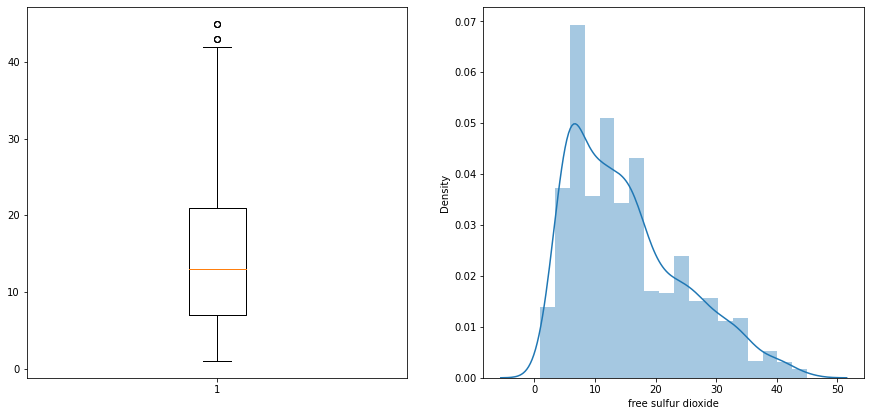

In [21]:
remove_outlier('free sulfur dioxide')
ax = plt.subplot(2,2,1)
plt.boxplot(data['free sulfur dioxide'])
ax = plt.subplot(2,2,2)
sns.distplot(data['free sulfur dioxide'])

##### total sulfur dioxide Before Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

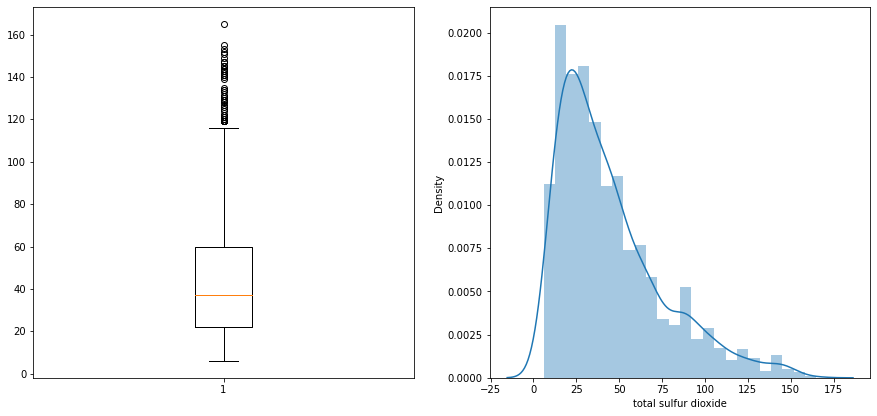

In [22]:
plt.figure(figsize=(15,15))
ax = plt.subplot(2,2,1)
plt.boxplot(data['total sulfur dioxide'])
ax = plt.subplot(2,2,2)
sns.distplot(data['total sulfur dioxide'])

##### total sulfur dioxide After Outlier Removal

C:\Users\saite\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

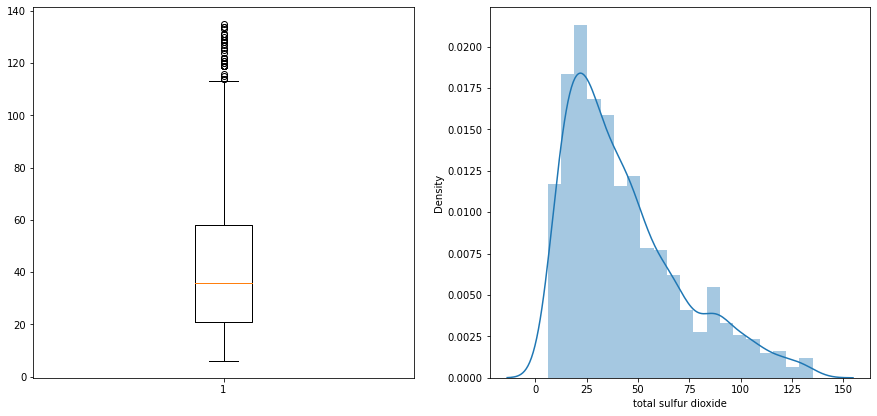

In [23]:
remove_outlier('total sulfur dioxide')
ax = plt.subplot(2,2,1)
plt.boxplot(data['total sulfur dioxide'])
ax = plt.subplot(2,2,2)
sns.distplot(data['total sulfur dioxide'])

#### Saving the filtered data

In [64]:
refined_data = data

#### Relation analysis between the features

<AxesSubplot:>

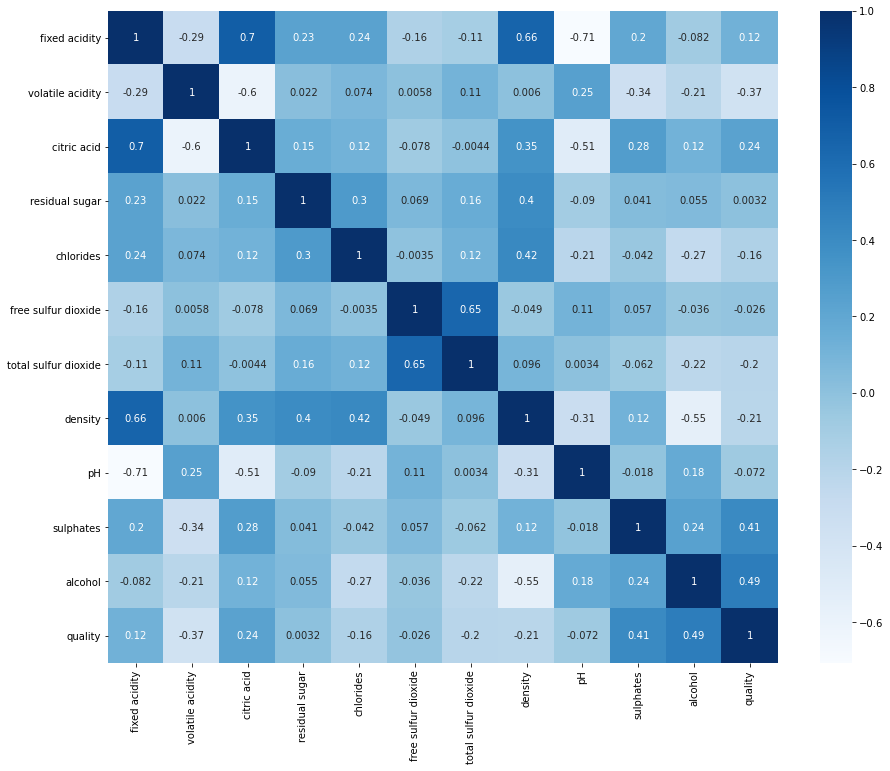

In [65]:
plt.figure(figsize = (15, 12))
sns.heatmap(refined_data.corr(), annot = True, cmap = 'Blues' )

#### Assignment of Target and Independent Variables

In [66]:
X = refined_data.drop('quality', axis = 1)
y = refined_data.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1340, dtype: int64

#### Encoding The Target Variable

In [67]:
y = y.apply(lambda x: 0 if x<6 else 1)
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1340, dtype: int64

#### Splitting the data into training and testing sets

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20)
X_train.shape, y_train.shape, X_test.shape

((1072, 11), (1072,), (268, 11))

#### Initializing Random Forest

In [83]:
rf = RandomForestClassifier(random_state=20)

##### OOB Error Findings

In [70]:
rf.set_params(oob_score= True, warm_start = True)
min = 15
max = 600
error_rate = {}
for i in range(min, max+1):
    rf.set_params(n_estimators = i)
    rf.fit(X_train, y_train)
    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error
    

C:\Users\saite\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\saite\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\saite\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\saite\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\saite\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were 

##### OOB Error Graph

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 600 Trees)')

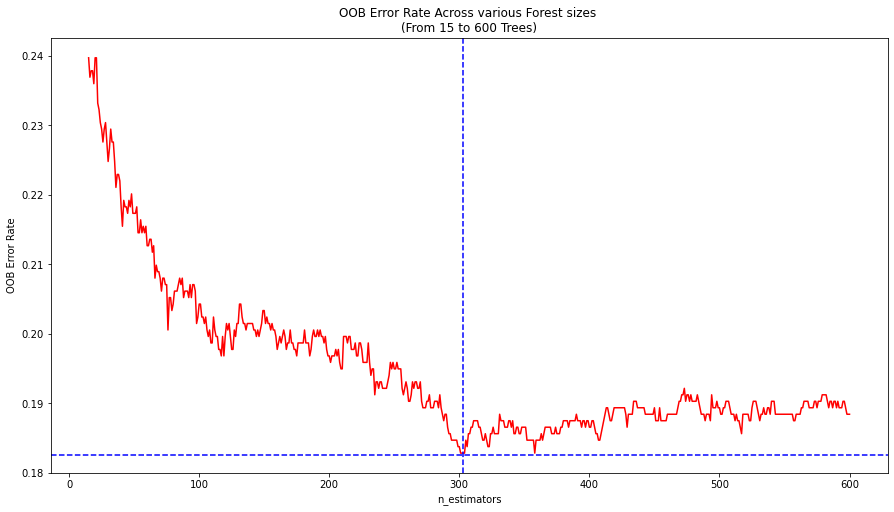

In [77]:
oob_series = pd.Series(error_rate)

fig, ax = plt.subplots(figsize=(15,8))

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.1825,color='blue',linestyle='--')
plt.axvline(303,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 600 Trees)')

#### HyperParameter Tuning

In [72]:
params = {'max_depth': [2, 3, 4, 5],
          'criterion': ['gini', 'entropy'],
          'max_features': ['log2', 'sqrt', 'auto', None],
          'bootstrap': [True, False]
         }

gscv = GridSearchCV(rf, cv= 10, param_grid = params, n_jobs = -1)
gscv.fit(X_train, y_train)
gscv.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': None}

##### Setting Optimum Paramters For Random Forest

In [78]:
rf.set_params(n_estimators=303,bootstrap=True, criterion = 'gini', max_depth = 5, max_features = None, warm_start=False,oob_score=False)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=303,
                       random_state=20)

##### Training the model

In [84]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=20)

##### Predicting the target variable

In [85]:
pred_y = rf.predict(X_test)

##### Confusion Matrix

Text(0.5, 1.0, 'Actual Vs Predicted Values')

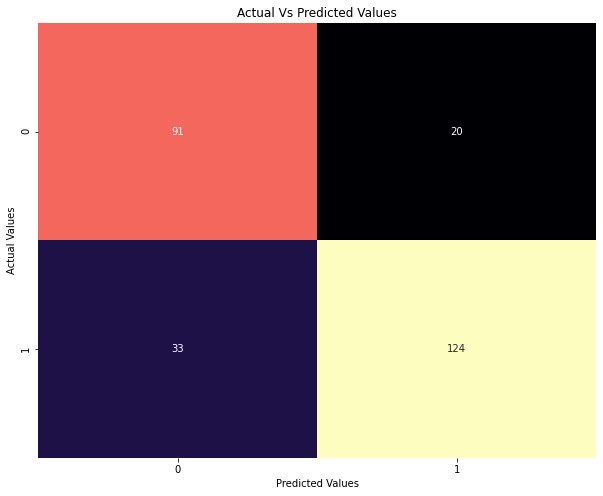

In [86]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pd.crosstab(index=y_test, columns=pred_y).values, annot=True, fmt = 'd', cmap = 'magma', cbar = False)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Actual Vs Predicted Values')

### Accuracy

In [88]:
accuracy = rf.score(X_test, y_test)
print('Accuracy of our model is - ', np.round(accuracy, 3))

Accuracy of our model is -  0.802


#### Area under curve

(0.001, 1.05)

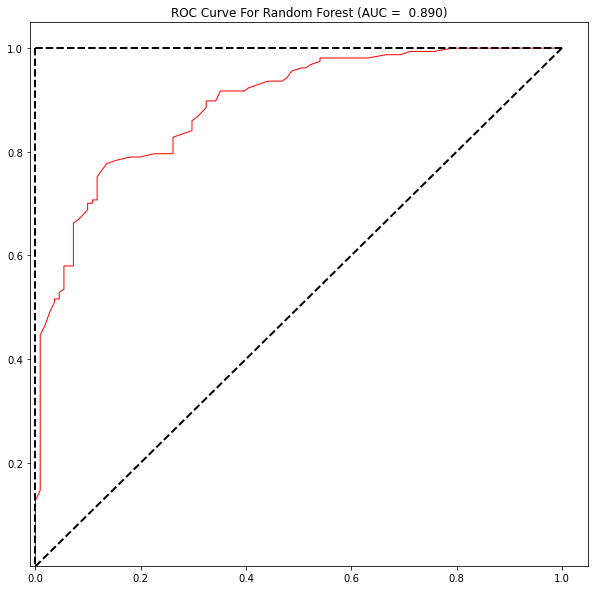

In [89]:
predictions_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

auc_result = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(fpr, tpr,
         color='red',
         linewidth=1)
plt.title('ROC Curve For Random Forest (AUC = {0: 0.3f})'.format(auc_result))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim(*(-0.01, 1.05))
plt.ylim(*(0.001, 1.05))

#### Classification Report

In [90]:
print(classification_report(pred_y, y_test, target_names=['Bad', 'Good']))


              precision    recall  f1-score   support

         Bad       0.82      0.73      0.77       124
        Good       0.79      0.86      0.82       144

    accuracy                           0.80       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.80      0.80      0.80       268



#### Predict Complete Dataset

In [91]:
without_target_set = data.drop('quality', axis = 1)
with_target_set = data.iloc[:, data.columns=='quality'].values.ravel()


In [92]:
whole_dataset_pred = rf.predict(without_target_set)

In [93]:
data['predicted_quality'] = np.where(with_target_set, whole_dataset_pred, with_target_set)

In [94]:
data['predicted_quality'].replace(to_replace=1, value = 'Good', inplace = True)
data['predicted_quality'].replace(to_replace=0, value = 'Bad', inplace = True)

In [95]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


##### Saving the predicted file in CSV format

In [97]:
data.to_csv('Predicted_Quality.csv')